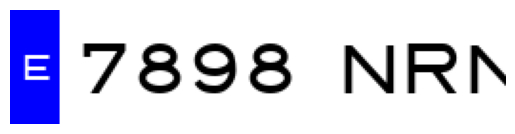

In [25]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
from matplotlib import pyplot as plt

# Configuración de la imagen
ANCHO = 260
ALTO = 60    

# Tipografía similar a la de matrículas (puedes buscar una más precisa)
FUENTE_PATH = "../font/DIN1451-36breit.ttf"

def generar_matricula(numero="0000", letras="AAA"):
    # Crear imagen en blanco
    img = Image.new("RGB", (ANCHO, ALTO), "white")
    draw = ImageDraw.Draw(img)

    # Dibujar el fondo azul de la UE
    draw.rectangle([0, 0, 25, ALTO], fill=(0, 0, 255))

    # Dibujar la "E" de España (se puede mejorar con una fuente específica)
    font_pequeña = ImageFont.truetype(FUENTE_PATH, 20)
    draw.text((6, 20), "E", font=font_pequeña, fill="white")

    # Dibujar los números y letras
    font_matricula = ImageFont.truetype(FUENTE_PATH, 40)
    draw.text((35, 10), f"{numero} {letras}", font=font_matricula, fill="black")

    # Convertir a OpenCV para agregar distorsión y ruido
    img_cv = np.array(img)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

    return img_cv

# Generar una imagen de prueba
num = f"{random.randint(1000, 9999)}"
let = "".join(random.choices("BCDFGHJKLMNPQRSTVWXYZ", k=3))
matricula = generar_matricula(num, let)

# Mostrar la imagen generada
plt.imshow(cv2.cvtColor(matricula, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar los ejes
plt.show()


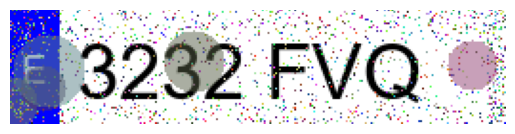

In [30]:
def aplicar_ruido_y_suciedad(img):
    img_ruido = img.copy()
    filas, columnas, _ = img_ruido.shape

    # Agregar ruido aleatorio
    cantidad_ruido = random.randint(500, 1000)  # Número de píxeles con ruido
    for _ in range(cantidad_ruido):
        x = random.randint(0, columnas - 1)
        y = random.randint(0, filas - 1)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        img_ruido[y, x] = color
    
    # Agregar ruido adicional en los bordes
    borde = 10  # Ancho del borde con ruido extra
    cantidad_ruido_borde = random.randint(300, 600)
    for _ in range(cantidad_ruido_borde):
        # Decidir en qué borde agregar ruido (superior, inferior, izquierdo o derecho)
        lado = random.randint(0, 3)
        
        if lado == 0:  # Borde superior
            x = random.randint(0, columnas - 1)
            y = random.randint(0, borde)
        elif lado == 1:  # Borde inferior
            x = random.randint(0, columnas - 1)
            y = random.randint(filas - borde, filas - 1)
        elif lado == 2:  # Borde izquierdo
            x = random.randint(0, borde)
            y = random.randint(0, filas - 1)
        else:  # Borde derecho
            x = random.randint(columnas - borde, columnas - 1)
            y = random.randint(0, filas - 1)
            
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        img_ruido[y, x] = color

    # Agregar manchas de suciedad con opacidad reducida
    cantidad_manchas = random.randint(5, 10)  # Número de manchas
    for _ in range(cantidad_manchas):
        radio = random.randint(5, 20)  # Tamaño de la mancha
        x = random.randint(0, columnas - 1)
        y = random.randint(0, filas - 1)
        color = (random.randint(50, 150), random.randint(50, 150), random.randint(50, 150))  # Colores oscuros
        overlay = img_ruido.copy()
        cv2.circle(overlay, (x, y), radio, color, -1)  # Dibujar círculo sólido en una capa superpuesta
        alpha = 0.5  # Nivel de opacidad (0: transparente, 1: opaco)
        img_ruido = cv2.addWeighted(overlay, alpha, img_ruido, 1 - alpha, 0)  # Combinar con opacidad reducida

    return img_ruido

# Aplicar ruido y suciedad a la matrícula
matricula_con_ruido = aplicar_ruido_y_suciedad(matricula)

# Mostrar la imagen con ruido y suciedad
plt.imshow(cv2.cvtColor(matricula_con_ruido, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar los ejes
plt.show()

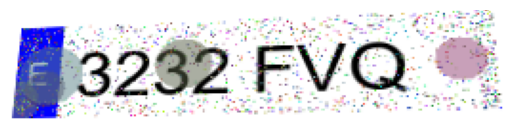

In [31]:
def aplicar_perspectiva_aleatoria(img):
    filas, columnas, _ = img.shape

    # Puntos originales (esquinas de la imagen)
    pts1 = np.float32([[0, 0], [columnas, 0], [0, filas], [columnas, filas]])

    # Puntos transformados (desplazados aleatoriamente)
    margen = 10  # Margen máximo de desplazamiento
    pts2 = np.float32([
        [random.randint(0, margen), random.randint(0, margen)],
        [columnas - random.randint(0, margen), random.randint(0, margen)],
        [random.randint(0, margen), filas - random.randint(0, margen)],
        [columnas - random.randint(0, margen), filas - random.randint(0, margen)]
    ])

    # Calcular la matriz de transformación
    matriz = cv2.getPerspectiveTransform(pts1, pts2)

    # Aplicar la transformación de perspectiva con fondo blanco
    img_perspectiva = cv2.warpPerspective(img, matriz, (columnas, filas), borderValue=(255, 255, 255))

    return img_perspectiva

# Aplicar perspectiva aleatoria a la matrícula
matricula_perspectiva = aplicar_perspectiva_aleatoria(matricula_con_ruido)

# Mostrar la imagen transformada
plt.imshow(cv2.cvtColor(matricula_perspectiva, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar los ejes
plt.show()

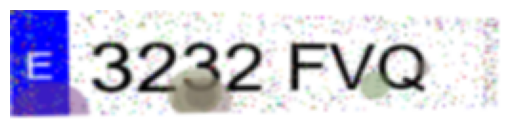

In [25]:
def aplicar_blur(img):
    # Generar un tamaño de kernel aleatorio (impar)
    kernel_size = random.choice([(1, 1), (3, 3), (5, 5), (7, 7)])
    return cv2.GaussianBlur(img, kernel_size, 0)

# Aplicar blur aleatorio a la matrícula con perspectiva
matricula_blur_aleatorio = aplicar_blur(matricula_perspectiva)

# Mostrar la imagen con blur aleatorio
plt.imshow(cv2.cvtColor(matricula_blur_aleatorio, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar los ejes
plt.show()